In [5]:
# Импорт необходимых библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score

# Создание исходного датасета
data = np.array(
    [
        [1, 5],
        [2, 7],
        [3, 7],
        [4, 10],
        [5, 11],
        [6, 14],
        [7, 17],
        [8, 19],
        [9, 22],
        [10, 28]
    ]
)

# Разделение на признаки и целевую переменную
x = data[:, 0]
y = data[:, 1]

Реализация градиентного спуска с SGD

In [6]:
n = len(x)

# Инициализация весов
w1 = 0.0
w0 = 0.0

# Параметры обучения
iterations = 100000
L = 0.001  # Learning rate
sample_size = 1  # Размер мини-батча для SGD

# Градиентный спуск
for i in range(iterations):
    id = np.random.choice(n, sample_size, replace=False)
    D_w0 = 2 * sum(-y[id] + w0 + w1 * x[id])
    D_w1 = 2 * sum(x[id] * (-y[id] + w0 + w1 * x[id]))
    w1 -= L * D_w1
    w0 -= L * D_w0

print(f"Обученные параметры: w0 = {w0:.4f}, w1 = {w1:.4f}")

Обученные параметры: w0 = 0.7804, w1 = 2.4294


Анализ корреляции и линейная регрессия

In [7]:
# Создание DataFrame и анализ корреляции
data_df = pd.DataFrame(data, columns=['x', 'y'])
print("Корреляция Пирсона:")
print(data_df.corr(method='pearson'))

# Подготовка данных для sklearn
X = data_df.values[:, :-1]
Y = data_df.values[:, -1]

# Разделение на обучающую и тестовую выборки
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/3, random_state=42)
print(f"\nОбучающая выборка (X_train):")
print(X_train.flatten())

Корреляция Пирсона:
         x        y
x  1.00000  0.97684
y  0.97684  1.00000

Обучающая выборка (X_train):
[ 8  3 10  5  4  7]


Кросс-валидация

In [9]:
# Настройка K-Fold кросс-валидации
kfold = KFold(n_splits=3, random_state=1, shuffle=True)
model = LinearRegression()
model.fit(X_train, Y_train)

# Выполнение кросс-валидации
results = cross_val_score(model, X, Y, cv=kfold)
print(f"Результаты кросс-валидации: {results}")
print(f"Средняя точность: {results.mean():.4f} (+/- {results.std() * 2:.4f})")

Результаты кросс-валидации: [ 0.88414769 -2.35154626  0.75792214]
Средняя точность: -0.2365 (+/- 2.9929)


Множественная линейная регрессия

In [10]:
# Загрузка датасета с множественными признаками
data_df = pd.read_csv('C:/Users/temak/Downloads/Telegram Desktop/multiple_independent_variable_linear.csv')
print("Первые 5 строк датасета:")
print(data_df.head())

# Подготовка данных
X = data_df.values[:, :-1]
Y = data_df.values[:, -1]

# Обучение модели множественной линейной регрессии
model = LinearRegression().fit(X, Y)
print(f"\nКоэффициенты модели: {model.coef_}")
print(f"Свободный член: {model.intercept_:.4f}")

Первые 5 строк датасета:
   x1  x2   y
0   0  22  88
1   1  13  62
2   1  15  67
3   1  14  62
4   2  18  77

Коэффициенты модели: [2.00672647 3.00203798]
Свободный член: 20.1094


Визуализация множественной регрессии

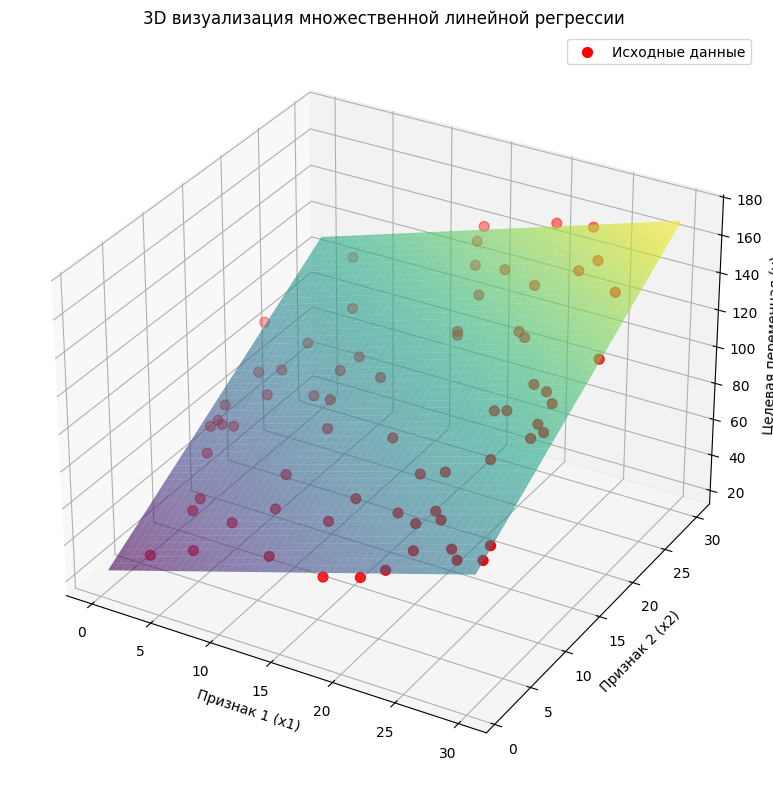

In [11]:
# Подготовка данных для визуализации
x1 = X[:, 0]
x2 = X[:, 1]
y = Y

# Создание 3D графика
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection='3d')

# Отображение исходных точек данных
ax.scatter3D(x1, x2, y, c='red', s=50, label='Исходные данные')

# Создание сетки для поверхности регрессии
x1_ = np.linspace(min(x1), max(x1), 100)
x2_ = np.linspace(min(x2), max(x2), 100)
X1_, X2_ = np.meshgrid(x1_, x2_)

# Вычисление предсказаний для поверхности
Y_ = model.intercept_ + model.coef_[0] * X1_ + model.coef_[1] * X2_

# Отображение поверхности регрессии
ax.plot_surface(X1_, X2_, Y_, cmap="viridis", alpha=0.6)

# Настройка графика
ax.set_xlabel('Признак 1 (x1)')
ax.set_ylabel('Признак 2 (x2)')
ax.set_zlabel('Целевая переменная (y)')
ax.set_title('3D визуализация множественной линейной регрессии')
plt.legend()
plt.tight_layout()
plt.show()